# cepstrum解析実装

## 音声の準備

In [7]:
import numpy as np
from numpy import array, arange, sin
import cmath
import matplotlib.pyplot as plt

In [8]:
a = 0.01                 # 最大振幅
f_list = [220, 440]  # まぜる周波数
fs = 16000                 # サンプリング周波数
sec = 0.1                   # サイン波の持続時間

amp = float(a) / len(f_list) # まぜる時の振幅
data = []
for n in arange(sec * fs):
    s = 0.0
    for f in f_list:
        s += amp * sin(2 * cmath.pi * f * n / fs)
    data.append(s)
data = array(data)

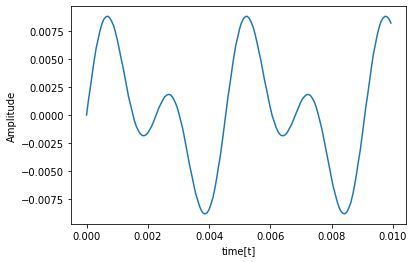

In [9]:
time = [round(i/fs, 5) for i in range(data.size)]
plt.plot(time[0:160], data[0:160])
plt.xlabel("time[t]")
plt.ylabel("Amplitude")
plt.show()

In [10]:
import IPython.display
IPython.display.Audio(data=data, rate=fs)

## DFT

In [58]:
def dft(x):
    N = len(x)
    A = arange(N)
    k = A.reshape(1, -1)
    t = A.reshape(-1, 1)
    # 行列演算形式になっているがwikiの数式そのまま
    M = x * cmath.e**(-1j * 2 * cmath.pi * k * t  / N)
    return np.sum(M, axis=1)

振幅スペクトラム


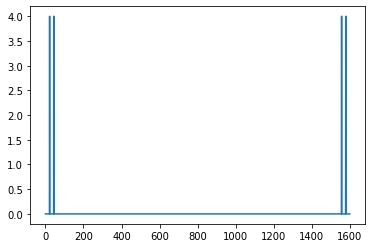

In [59]:
print("振幅スペクトラム")
plt.plot(np.abs(dft(data)))
plt.show()